In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def get_pops(fname):
    
    data = open(fname, 'r').readlines()
    
    blank=0
    pops=[]
    for line in data:
        
        if line == '\n':
            blank+=1
            continue
                
        if blank==4:
            break
        
        if blank==3:
            pops.append(float(line.strip()))
            
        
    if 'microstate' in fname:
        pops += [0] * (100 - len(pops))
        
    '''        
    if len(data) == 116:
        pops = data[105:109]
    else:
        pops = data[105:205]
    
    for i in range(len(pops)):
        if pops[i] == '\n':
            pops[i] = float(0)
        else:
            pops[i] = float(pops[i].strip())
    '''
    return pops

In [3]:
def read_data(iters):
    
    micros = glob('microstate_info*.txt')
    macros = glob('macrostate_info*.txt')
    
    micro_df = pd.DataFrame(columns=range(1,101), index=range(1, iters+1))
    macro_df = pd.DataFrame(columns=range(1,5), index=range(1, iters+1))
      
    for f in micros:
        #it = int(f.split('/')[2].strip().split('-')[1].strip().split('.')[0])
        pops = get_pops(f)
        micro_df.loc[1] = pops
        
    for f in macros:
        #it = int(f.split('/')[2].strip().split('-')[1].strip().split('.')[0])
        pops = get_pops(f)
        macro_df.loc[1] = pops
        
    return micro_df, macro_df

In [4]:
def plot():
    
    micro_df, macro_df = read_data(iters=1)
    #print micro_df
    #print macro_df
    micro_ax = micro_df.plot(kind='line',marker='o',colormap='gist_rainbow', legend=False)
    micro_ax.set_xlabel('Iterations')
    micro_ax.set_ylabel('Fractional population')
    micro_ax.set_title('Fractional population of the microstates \n at each iteration - ensemble size=10, dur=10 ns')
    micro_ax.set_xlim(0,2)
    plt.savefig('microstate-frac-pop.png')
    
    legendHandles = micro_ax.get_legend_handles_labels()
    a = plt.figure()
    a.legend(legendHandles[0],legendHandles[1],loc='center',ncol=4)
    a.canvas.draw()
    a.savefig('microstate-legend.png',bbox_inches='tight')
    
    
    macro_ax = macro_df.plot(kind='line',marker='o',colormap='gist_rainbow')
    macro_ax.set_xlabel('Iterations')
    macro_ax.set_ylabel('Fractional population')
    macro_ax.set_xlim(0,2)
    macro_ax.set_title('Fractional population of the macrostates \n at each iteration - ensemble size=10, dur=10 ns')
    plt.savefig('macrostate-frac-pop.png')

In [19]:
def read_uncertainty():
    macro_df = pd.DataFrame(columns=range(1,5), index=range(1, 2))
    
    macros = glob('macrostate_info.txt')
    
    for f in macros:
        
        #it = int(f.split('/')[3].strip().split('-')[1].strip().split('.')[0])
        
        data = open(f, 'r').readlines()
        
        blank=0
        vals=[]
        for line in data:
        
            if line == '\n':
                blank+=1
                continue
        
            if blank==7:
                vals.append(float(line.strip()))
        
        macro_df.loc[1] = vals

    return macro_df

In [20]:
def plot_uncertainty():
    
    macro_df = read_uncertainty()
    print macro_df
    macro_ax = macro_df.plot(kind='line',marker='o',colormap='gist_rainbow')
    macro_ax.set_xlabel('Iterations')
    macro_ax.set_ylabel('Uncertainty in Eigen values')
    macro_ax.set_xlim(0,2)
    macro_ax.set_title('Uncertainty of eigen values \n at each iteration - ensemble size=10, dur=10 ns')
    plt.savefig('uncertainty-macro.png')

     1           2          3          4
1  NaN  0.00314387  0.0135661  0.0230898


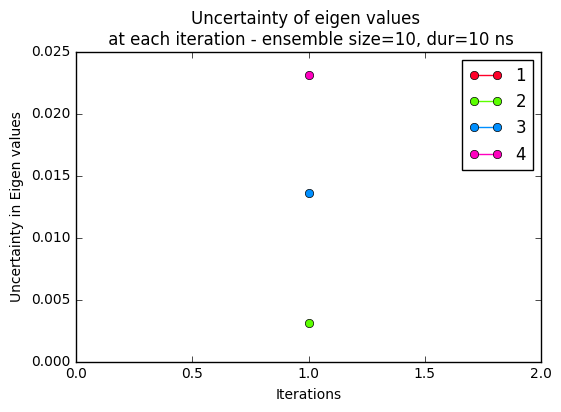

In [21]:
# Plot single iters
plot_uncertainty()